# Notebook to conduct exploratory data analysis

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Check data completion

In [3]:
stroke_data = pd.read_csv('datasets/healthcare_stroke_dataset.csv', sep=',')

In [4]:
stroke_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   str    
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   str    
 6   work_type          5110 non-null   str    
 7   Residence_type     5110 non-null   str    
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   str    
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), str(5)
memory usage: 479.2 KB


In [5]:
# Remove rows where there is a null value
stroke_data.dropna(axis=0, inplace=True)

# Convert columns
stroke_data['age'] = stroke_data['age'].astype('int')
stroke_data['hypertension'] = np.where(stroke_data['hypertension'] == 0, 'No', 'Yes')
stroke_data['heart_disease'] = np.where(stroke_data['heart_disease'] == 0, 'No', 'Yes')
stroke_data['stroke'] = np.where(stroke_data['stroke'] == 0, 'No', 'Yes')


In [6]:
stroke_data.info()

<class 'pandas.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   str    
 2   age                4909 non-null   int64  
 3   hypertension       4909 non-null   str    
 4   heart_disease      4909 non-null   str    
 5   ever_married       4909 non-null   str    
 6   work_type          4909 non-null   str    
 7   Residence_type     4909 non-null   str    
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   str    
 11  stroke             4909 non-null   str    
dtypes: float64(2), int64(2), str(8)
memory usage: 498.6 KB


In [7]:
# Save clean data
stroke_data.to_csv('datasets/healthcare_stroke_dataset_clean.csv', sep=',', index=False)

In [8]:
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
2,31112,Male,80,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,60182,Female,49,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,1665,Female,79,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
5,56669,Male,81,No,No,Yes,Private,Urban,186.21,29.0,formerly smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13,No,No,No,children,Rural,103.08,18.6,Unknown,No
5106,44873,Female,81,No,No,Yes,Self-employed,Urban,125.20,40.0,never smoked,No
5107,19723,Female,35,No,No,Yes,Self-employed,Rural,82.99,30.6,never smoked,No
5108,37544,Male,51,No,No,Yes,Private,Rural,166.29,25.6,formerly smoked,No


### Exploratory plots

In [33]:
stroke_positive = stroke_data[stroke_data['stroke'] == 'Yes']
stroke_negative = stroke_data[stroke_data['stroke'] == 'No']

<Axes: >

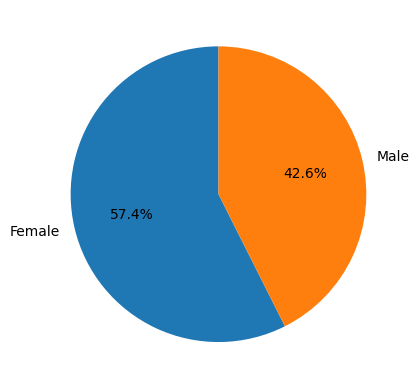

In [34]:
# Male / Female ratio
gender_counts = stroke_positive['gender'].value_counts()
gender_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    ylabel=''  
)

<Axes: ylabel='Frequency'>

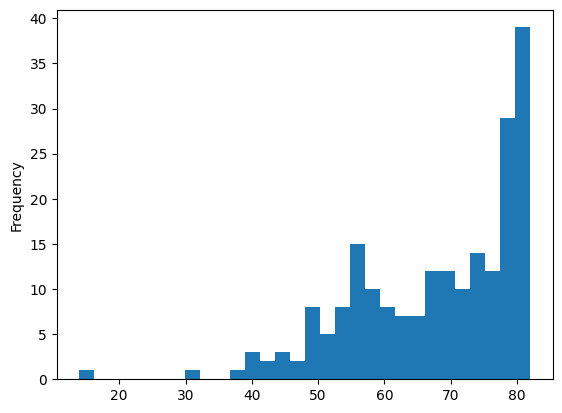

In [35]:
# Age distribution
stroke_positive['age'].plot(kind='hist', bins=30)

<Axes: >

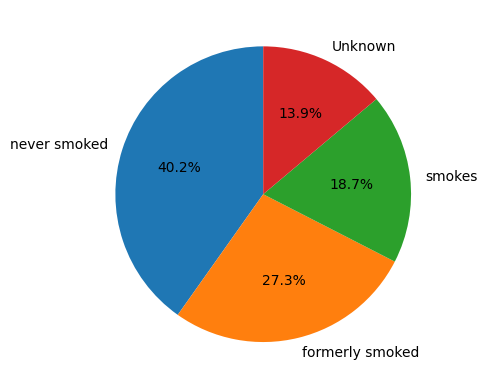

In [36]:
# Smoking statuts - stroke-positive
smoking_counts = stroke_positive['smoking_status'].value_counts()
smoking_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    ylabel=''  
)

<Axes: >

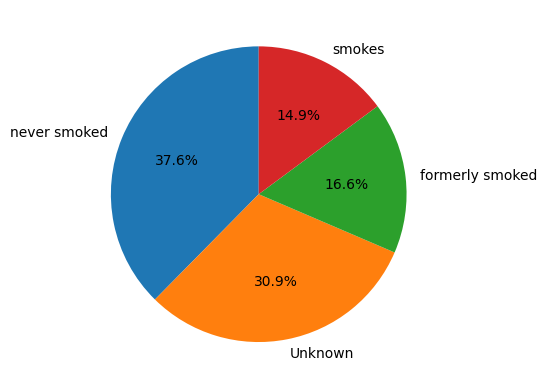

In [37]:
# Smoking statuts - stroke-negative
smoking_counts = stroke_negative['smoking_status'].value_counts()
smoking_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    ylabel=''  
)

<Axes: title={'center': 'avg_glucose_level'}, xlabel='stroke'>

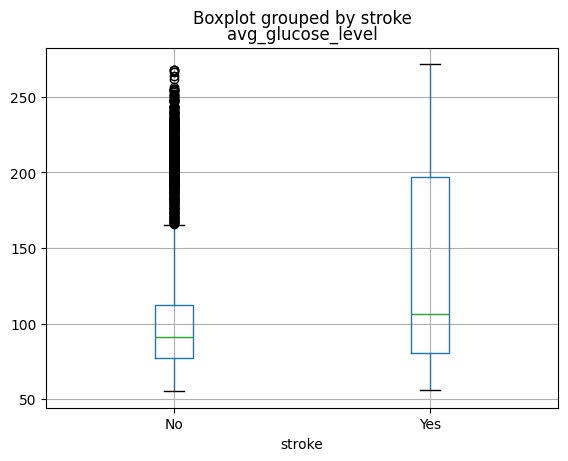

In [38]:
# Glucose levels and effects on stroke
stroke_data.boxplot(
    column='avg_glucose_level',
    by='stroke'
)

<Axes: title={'center': 'bmi'}, xlabel='stroke'>

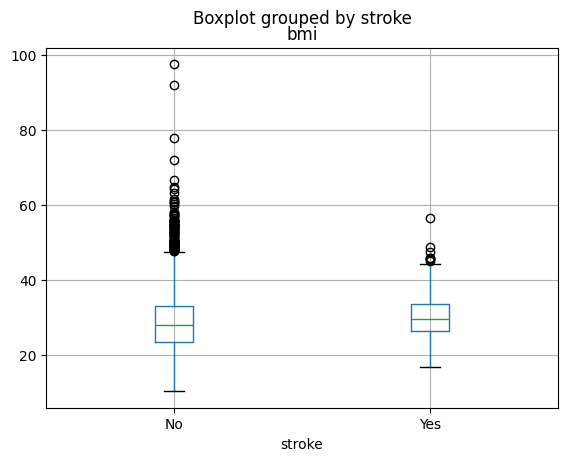

In [39]:
# BMI and effects on stroke
stroke_data.boxplot(
    column='bmi',
    by='stroke'
)